<a href="https://colab.research.google.com/github/love-bees/twitter/blob/master/exploratory_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv('data_cleaned.csv', encoding='utf-8')
df = pd.DataFrame(data)

In [2]:
df.head()

,Unnamed: 0,datetime,coordinates,hashes,text,sentiment_score
0,0,2020-04-09 18:35:26,"42.9607521, -80.05056563",NaN,"Hey everyone , wont be streaming until this wh...",0.4215
1,1,2020-04-09 18:34:29,"53.55, -3.05",covid postcovid19 quarantine dogs,"Top Tip Thursday Once lockdown is over, have ...",0.3818
2,2,2020-04-09 18:48:31,"40.89245946, -74.13999694",NaN,Palestinian national heroine Bisan Al-Jubeh (u...,0.5719
3,3,2020-04-09 18:48:21,"21.31752233, -157.92366028",harley808 zeus808 storm808 lovemydogs thursday...,Thankful Thursday #harley808 #zeus808 #storm80...,0.5719
4,4,2020-04-09 18:47:04,"48.47593351, -81.32806152",NaN,Neighbourhood getting loud for healthcare work...,0.0000


In [3]:
df = df.drop(df.columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62f4c90ba8>]],
      dtype=object)

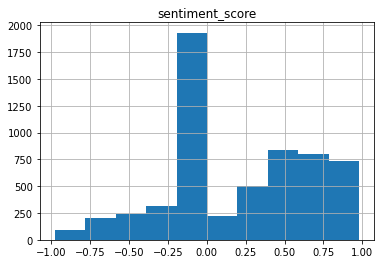

In [4]:
df.hist()

In [5]:
print('POZITIVAN\n')
print(df['text'][1955],'\n')
print('Ocena:', df['sentiment_score'][1955], '\n')
print('NEUTRALAN\n')
print(df['text'][5], '\n')
print('Ocena: ', df['sentiment_score'][5], '\n')
print('NEGATIVAN\n')
print(df['text'][2668],'\n')
print('Ocena: ', df['sentiment_score'][2668], '\n')


POZITIVAN

celebrating three days of warm sunshine. long evenings in my backyard. cold beer in hand + conversations with my love. and the beauty that is this earth which we are so fortunate to call home..maybe covid-19 helps  

Ocena: 0.9784 

NEUTRALAN

Its Thursday in case anyone was wondering #whatdayisit #covid #shelterinplace #kmarkrealtor #era #workweek #staysafe @ Oak Point, Texas  

Ocena:  0.0 

NEGATIVAN

During Covid 19 and Lockdown in Pakistan, I have had a chance to go to different banks but trust me I haven't seen anyone as stupid as @MeezanBankLtd in following social distancing protocols. Wasting time and making people stand with no social distancing. Stupid. PLAIN stupid  

Ocena:  -0.9451 



Text(0, 0.5, 'Percentage')

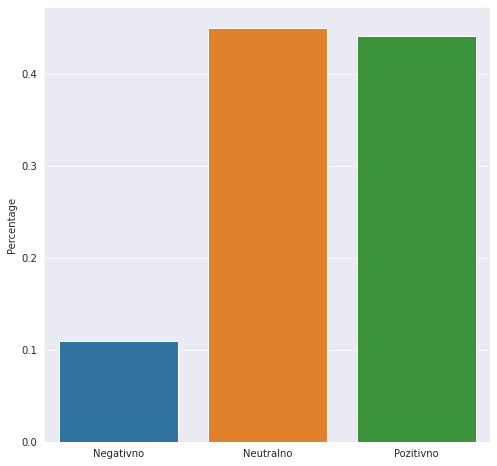

In [10]:
def sentiment_rounded(compound):
    if compound > 0.33:
        return 1
    elif compound < -0.33:
        return -1
    else:
        return 0

def sentiment_label(score):
    if score == 1:
        return 'positive'
    elif score == -1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_rounded'] = df['sentiment_score'].apply(sentiment_rounded)
df['label'] = df['sentiment_rounded'].apply(sentiment_label)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 8))
counts = df.sentiment_rounded.value_counts(normalize=True)
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negativno', 'Neutralno', 'Pozitivno'])
ax.set_ylabel("Percentage")

In [11]:
print('Neutralno: ', 100*round(df.label.value_counts()[0]/df.label.count(),3), '%')
print('Pozitivno: ', 100*round(df.label.value_counts()[1]/df.label.count(),3), '%')
print('Negativno: ', 100*round(df.label.value_counts()[2]/df.label.count(),3), '%')

Neutralno:  45.0 %
Pozitivno:  44.1 %
Negativno:  10.9 %


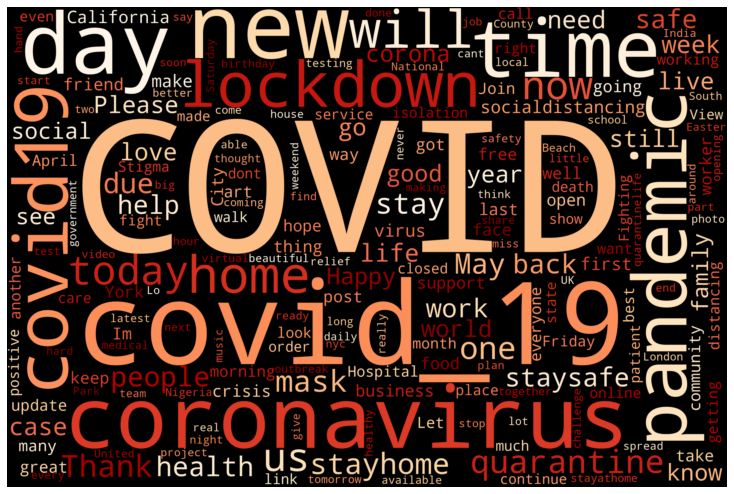

In [12]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 

STOPWORDS.add('amp')
STOPWORDS.add('xe0')
STOPWORDS.add('xa4')

import matplotlib.pyplot as plt
text = [text for text in df.text]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    colormap='OrRd',
    collocations=False,
    max_words=200,
    stopwords=STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [13]:
hashtags = []
hasht = df.hashes.dropna()
for item in hasht:
    hashtags.append(item)
hashes_single = []
for i,h in enumerate(hashtags):
    hashes_single.append(hashtags[i].split())
h = []
for i in hashes_single:
    for j in i:
        h.append(j.lower())   

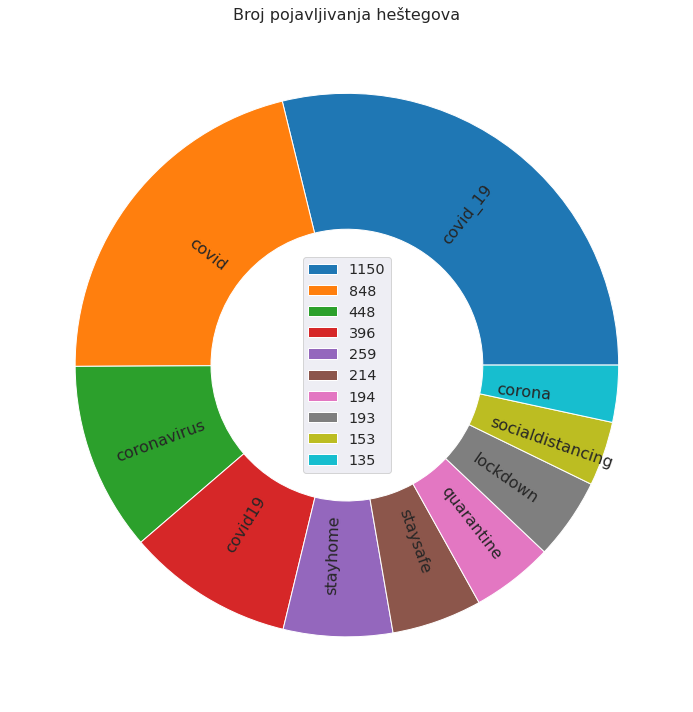

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
hashes_single = pd.Series(h)

x = hashes_single
x = x.value_counts().head(10)

x.plot(labels=x.index,rotatelabels=0.5,labeldistance=0.55,wedgeprops=dict(width=0.5), kind='pie', figsize=(10,10),fontsize=16, radius=1)

plt.title('Broj pojavljivanja heštegova', fontsize=16)
plt.legend(x.values,loc=10, fontsize='x-large')
plt.ylabel('')
plt.tight_layout()